In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
c
from sklearn.model_selection import train_test_split
import os
import random
from PIL import Image
import shutil
import cv2

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [18]:
os.getcwd()

'/Users/anarpereira/Docs_tcc/TCC'

In [19]:
diretorio_base= '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp'

In [20]:
files = []
folders = []

df = pd.DataFrame(columns=['qty_files', 'folder', 'file_paths'])  # Cria um DataFrame vazio com as colunas desejadas

for pasta in os.listdir(diretorio_base):
    if 'PRE_PROCESSING' in pasta and '.' not in pasta:
        folders.append(pasta)
        caminho_pasta = os.path.join(diretorio_base, pasta)
        if os.path.isdir(caminho_pasta):
            # Obtém os arquivos da pasta
            arquivos = os.listdir(caminho_pasta)
            
            files_path = [os.path.join(pasta, arquivo) for arquivo in arquivos if '.ipy' not in arquivo]
    
            # Cria um DataFrame temporário com as informações da iteração atual
            temp_df = pd.DataFrame({'qty_files': len(files_path), 'folder': pasta, 'file_paths': [files_path]}, index=[0])
            
            if (len(files_path)!=0):
                # Concatena o DataFrame temporário com o DataFrame principal
                df = pd.concat([df, temp_df], ignore_index=True)
                files.extend(files_path)

In [21]:
df.shape

(5, 3)

In [22]:
df = df.sort_values(by='qty_files', ascending=False)[:5]

In [23]:
df[['qty_files','folder']]

,qty_files,folder
0,358,Marasmiusamazonicus_PRE_PROCESSING
2,325,Phallusindusiatuscomplex_PRE_PROCESSING
1,265,Cookeinatricholoma_PRE_PROCESSING
4,198,Coprinellusdisseminatus_PRE_PROCESSING
3,194,Schizophyllumcommune_PRE_PROCESSING


In [24]:
folders = df['folder'].to_list()

In [25]:
dict_names = {"Marasmiusamazonicus_PRE_PROCESSING":'Marasmius Amazonicus',
"Phallusindusiatuscomplex_PRE_PROCESSING":'Phallus indusiatus',
"Schizophyllumcommune_PRE_PROCESSING":'Schizophyllum commune',
"Coprinellusdisseminatus_PRE_PROCESSING":'Coprinellus Disseminatus',
"Cookeinatricholoma_PRE_PROCESSING":'Cookeina tricholoma'}

In [26]:
dict_codes = {"Marasmiusamazonicus_PRE_PROCESSING":1,
"Phallusindusiatuscomplex_PRE_PROCESSING":2,
"Schizophyllumcommune_PRE_PROCESSING":3,
"Coprinellusdisseminatus_PRE_PROCESSING":4,
"Cookeinatricholoma_PRE_PROCESSING":5}

In [27]:
def get_data(folder_division):
    df = pd.DataFrame(columns=['species','file_path','folder','folder_division'])

    for files in os.listdir(folder_division):
        print(files)
        if '.' not in files and '.DS_Store' not in files:
            species = files.split('_')[0].lower()
            new_file_list = []
            
            for i in os.listdir(os.path.join(folder_division, files)):
                # print(i)
                if '.DS_Store' not in i:
                    new_file_list.append(i)
            qty_files = len(new_file_list)
            
            df_temp = pd.DataFrame(data={'species':[species]*qty_files,
                                         'file_path':new_file_list,
                                         'folder':[files]*qty_files,
                                         'folder_division':[folder_division]*qty_files},
                                   columns=['species','file_path','folder','folder_division'])

            df = pd.concat([df, df_temp])
    return df.reset_index()

df_train = get_data(diretorio_base)
df_train['full_path'] = df_train['folder_division'] + '/' + df_train['folder'] + '/' + df_train['file_path']

Marasmiusamazonicus_PRE_PROCESSING
Cookeinatricholoma_PRE_PROCESSING
Phallusindusiatuscomplex_PRE_PROCESSING
Schizophyllumcommune_PRE_PROCESSING
train
Coprinellusdisseminatus_PRE_PROCESSING


In [28]:
df_train.head()

,index,species,file_path,folder,folder_division,full_path
0,0,marasmiusamazonicus,processed_SSMarasmius_amazinicus_Voucher_135_PC264806_26_12_2016_Cacao_Trail_CJL_BR_345.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazinicus_Voucher_135_PC264806_26_12_2016_Cacao_Trail_CJL_BR_345.jpg
1,1,marasmiusamazonicus,processed_SSMarasmius_amazonicus_PC287027_28_12_2016_Caju_Trail_CJL_BR_198.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazonicus_PC287027_28_12_2016_Caju_Trail_CJL_BR_198.jpg
2,2,marasmiusamazonicus,processed_SSMarasmius_amazonicus_PC1032337_3_1_2017_Taboca_Trail_CJL_BR_336.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazonicus_PC1032337_3_1_2017_Taboca_Trail_CJL_BR_336.jpg
3,3,marasmiusamazonicus,processed_SSP1086381_8_1_2019_Torre_2_Trail_CJL_BR_5.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSP1086381_8_1_2019_Torre_2_Trail_CJL_BR_5.jpg
4,4,marasmiusamazonicus,processed_SSMarasmius_amazinicus_Voucher_135_PC264844_26_12_2016_Cacao_Trail_CJL_BR_165.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazinicus_Voucher_135_PC264844_26_12_2016_Cacao_Trail_CJL_BR_165.jpg


In [37]:
df_train =df_train.loc[df_train['species']!='train']

In [38]:
df_train['species_code'] = df_train['folder'].apply(lambda x: dict_codes[x])

# Modeling

In [39]:
import os
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [40]:
# Definir parâmetros
input_shape = (224, 224, 3)
num_classes = 5 
k_folds = 5 
batch_size = 32
epochs = 150

In [42]:
# Função para criar o modelo
import tensorflow as tf
def create_model():
    base_model = ResNet50(include_top=False, input_shape=input_shape)
    
    for layer in base_model.layers:
        layer.trainable=False
        
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                 tf.keras.metrics.Precision(),
                                                                                                 tf.keras.metrics.Recall()])
    
    return model

In [43]:
x = create_model()

2025-03-16 15:23:47.229692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
x.compile()
x.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 26,740,613
Trainable params: 3,152,901
Non-trainable params: 23,587,712
____________________________________

In [45]:
import tensorflow as tf
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [46]:
# Convertendo para arrays NumPy
data = np.array(df_train['full_path'])
labels = np.array(df_train['species_code'])

In [47]:
data

array(['/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazinicus_Voucher_135_PC264806_26_12_2016_Cacao_Trail_CJL_BR_345.jpg',
       '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazonicus_PC287027_28_12_2016_Caju_Trail_CJL_BR_198.jpg',
       '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Marasmiusamazonicus_PRE_PROCESSING/processed_SSMarasmius_amazonicus_PC1032337_3_1_2017_Taboca_Trail_CJL_BR_336.jpg',
       ...,
       '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Coprinellusdisseminatus_PRE_PROCESSING/processed_FKnumeroVP012P4MG(11)-llgwYT_33.jpg',
       '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/imagens_tratadas_2_unsharp/Coprinellusdisseminatus_PRE_PROCESSING/processed_FK2218(7)-hAa9h1_64.jpg',
       '/Users/anarpereira/Do

In [55]:
df = pd.DataFrame({'paths':data, 'labels':labels}).astype(str)
df.to_csv('just_unsharp.csv')

In [49]:
accuracies = []
losses = []
val_accuracies = []
val_losses = []

from sklearn.model_selection import train_test_split

df = pd.DataFrame({'paths':data, 'labels':labels}).astype(str)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, shuffle=True)

# # Dividindo os dados em treino e validação
# train_data = data
# train_labels = labels
df_train = pd.DataFrame({'paths':X_train, 'labels':y_train}).astype(str)
df_val = pd.DataFrame({'paths':X_val, 'labels':y_val}).astype(str)

# # Dividindo os dados em treino e validação
# val_data = data[1073:]
# val_labels = labels[1073:]
# df_val = pd.DataFrame({'paths':val_data, 'labels':val_labels}).astype(str)

# Gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# Geradores de dados
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Criar o modelo
model = create_model()

# Callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint(f'best_model_just_unsharp_150.h5', save_best_only=False, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# Treinar o modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, mcp_save, reduce_lr_loss]
)

with open('history_com_trat_just_unsharp.pickle', 'wb') as handle:
    pickle.dump(history, handle)
    
# Armazenar os resultados
accuracies.append(history.history['accuracy'])
losses.append(history.history['loss'])
val_accuracies.append(history.history['val_accuracy'])
val_losses.append(history.history['val_loss'])

# Fazer previsões no conjunto de validação
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = val_generator.classes


/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/preprocessing/image.py:989: UserWarning: Found 1 invalid image filename(s) in x_col="paths". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


Found 1071 validated image filenames belonging to 5 classes.
Found 269 validated image filenames belonging to 5 classes.
Epoch 1/150
34/34 [==============================] - 173s 5s/step - loss: 1.6374 - accuracy: 0.3866 - precision_1: 0.4238 - recall_1: 0.0598 - val_loss: 1.3171 - val_accuracy: 0.4907 - val_precision_1: 0.6106 - val_recall_1: 0.2565 - lr: 0.0010
Epoch 2/150
34/34 [==============================] - 164s 5s/step - loss: 1.1891 - accuracy: 0.5247 - precision_1: 0.7395 - recall_1: 0.2782 - val_loss: 1.0865 - val_accuracy: 0.5948 - val_precision_1: 0.6860 - val_recall_1: 0.4387 - lr: 0.0010
Epoch 3/150
34/34 [==============================] - 168s 5s/step - loss: 1.0455 - accuracy: 0.5966 - precision_1: 0.7784 - recall_1: 0.3903 - val_loss: 0.9840 - val_accuracy: 0.6357 - val_precision_1: 0.7647 - val_recall_1: 0.4349 - lr: 0.0010
Epoch 4/150
34/34 [==============================] - 168s 5s/step - loss: 0.9548 - accuracy: 0.6284 - precision_1: 0.7738 - recall_1: 0.4631 - v

INFO:tensorflow:Assets written to: ram://58b28694-47fe-49d7-837c-b798a22d9db7/assets


INFO:tensorflow:Assets written to: ram://58b28694-47fe-49d7-837c-b798a22d9db7/assets


9/9 [==============================] - 31s 3s/step


In [50]:
np.mean(history.history['accuracy'])

0.8477646046701599

In [51]:
from sklearn.metrics import classification_report

In [35]:
# # Gerar e salvar o relatório de classificação
# report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys(),output_dict=True)
# with open(f'classification_report_just_unsharp.txt', 'w') as f:
#     f.write(report)

In [52]:
report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys(),output_dict=True)

In [53]:
pd.DataFrame(report).to_csv('classification_report_just_unsharp.csv')

In [54]:
pd.DataFrame(report)

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.901235,0.951613,0.620690,0.805556,0.770492,0.840149,0.809917,0.842967
recall,0.869048,0.936508,0.642857,0.783784,0.824561,0.840149,0.811352,0.840149
f1-score,0.884848,0.944000,0.631579,0.794521,0.796610,0.840149,0.810312,0.841218
support,84.000000,63.000000,28.000000,37.000000,57.000000,0.840149,269.000000,269.000000


### Resnet 50 V2

In [39]:
versao = 'just_unsharp_150_noweigths'

In [59]:
# Função para criar o modelo
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2

def create_model_v2():
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights=None)
    
    for layer in base_model.layers:
        layer.trainable=False
        
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                 tf.keras.metrics.Precision(),
                                                                                                 tf.keras.metrics.Recall()])
    
    return model

def create_model_resnet50():
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights=None)
    
    for layer in base_model.layers:
        layer.trainable=False
        
    model = Sequential([
        base_model,
        # GlobalAveragePooling2D(),
        # Dense(1024, activation='relu'),
        # Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                 tf.keras.metrics.Precision(),
                                                                                                 tf.keras.metrics.Recall()])
    
    return model

In [40]:
accuracies = []
losses = []
val_accuracies = []
val_losses = []

from sklearn.model_selection import train_test_split

df = pd.DataFrame({'paths':data, 'labels':labels}).astype(str)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, shuffle=True)

# # Dividindo os dados em treino e validação
# train_data = data
# train_labels = labels
df_train = pd.DataFrame({'paths':X_train, 'labels':y_train}).astype(str)
df_val = pd.DataFrame({'paths':X_val, 'labels':y_val}).astype(str)

# # Dividindo os dados em treino e validação
# val_data = data[1073:]
# val_labels = labels[1073:]
# df_val = pd.DataFrame({'paths':val_data, 'labels':val_labels}).astype(str)

# Gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# Geradores de dados
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Criar o modelo
model = create_model_v2()

# Callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint(f'best_model_{versao}.h5', save_best_only=False, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# Treinar o modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, mcp_save, reduce_lr_loss]
)


# Armazenar os resultados
accuracies.append(history.history['accuracy'])
losses.append(history.history['loss'])
val_accuracies.append(history.history['val_accuracy'])
val_losses.append(history.history['val_loss'])

# Fazer previsões no conjunto de validação
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = val_generator.classes


Found 1057 validated image filenames belonging to 5 classes.
Found 265 validated image filenames belonging to 5 classes.
Epoch 1/150
34/34 [==============================] - 92s 3s/step - loss: 1.5983 - accuracy: 0.2507 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 1.5998 - val_accuracy: 0.2491 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - lr: 0.0010
Epoch 2/150
34/34 [==============================] - 101s 3s/step - loss: 1.5811 - accuracy: 0.2715 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 1.5943 - val_accuracy: 0.2491 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - lr: 0.0010
Epoch 3/150
34/34 [==============================] - 101s 3s/step - loss: 1.5697 - accuracy: 0.3046 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 1.5957 - val_accuracy: 0.3208 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - lr: 0.0010
Epoch 4/150
34/34 [==============================] - 102s 3s/step - loss: 1.5571 - accuracy: 0.30

In [41]:
from sklearn.metrics import classification_report,roc_auc_score

# Gerar e salvar o relatório de classificação
report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys())
with open(f'classification_report_fold_{versao}.txt', 'w') as f:
    f.write(report)

with open(f'history_{versao}.pickle', 'wb') as handle:
    pickle.dump(history, handle)

INFO:tensorflow:Assets written to: ram://8a51c309-5a1f-4035-87df-60c7db3e197c/assets


INFO:tensorflow:Assets written to: ram://8a51c309-5a1f-4035-87df-60c7db3e197c/assets


In [52]:
!pip install netron


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [58]:
import netron

netron.start('best_model_fold_1_150epochs.h5')


Serving 'best_model_fold_1_150epochs.h5' at http://localhost:8080


('localhost', 8080)

In [46]:
!pip install pydot


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [54]:
!pip install graphviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [56]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Validation

In [39]:
from sklearn.metrics import classification_report

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=diretorio_base,
    x_col='paths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


# Fazer previsões no conjunto de validação
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = val_generator.classes

# Gerar e salvar o relatório de classificação
report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys(),output_dict=True)

df_results_semfundo = pd.DataFrame(report).transpose()

Found 265 validated image filenames belonging to 5 classes.
9/9 [==============================] - 19s 2s/step


In [41]:
df_results_semfundo.to_csv('report_val_sem_fundo.csv')

In [42]:
results_df['Validation Accuracy'].max()

0.8943396210670471

In [29]:
results_df = pd.DataFrame({
    'Fold': range(0, len(accuracies[0])),
    'Train Accuracy': accuracies[0],
    'Train Loss': losses[0],
    'Validation Accuracy': val_accuracies[0],
    'Validation Loss': val_losses[0]
})


In [31]:
results_df.to_csv(f'best_model_just_unsharp_150.csv', index=False)

In [32]:
results_df

,Fold,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss
0,0,0.325449,1.761969,0.467925,1.459521
1,1,0.436140,1.356694,0.577358,1.243531
2,2,0.529801,1.175816,0.509434,1.247553
3,3,0.567644,1.124450,0.547170,1.127505
4,4,0.608325,1.013931,0.554717,1.118129
...,...,...,...,...,...
93,93,0.947020,0.177646,0.875472,0.523683
94,94,0.938505,0.184199,0.875472,0.485393
95,95,0.948912,0.167590,0.886792,0.481454
96,96,0.952696,0.162634,0.886792,0.485728


In [27]:
with open('model_com_trat.pickle', 'wb') as handle:
    pickle.dump(model, handle)

INFO:tensorflow:Assets written to: ram://20d177db-5c4e-47a7-9346-8bddd65d62cd/assets


INFO:tensorflow:Assets written to: ram://20d177db-5c4e-47a7-9346-8bddd65d62cd/assets


In [1]:
import pandas as pd
for i in range(1,6):
    data = []

    with open(f"classification_report_fold_{i}_more_epochs.txt", "r") as f:
        lines = f.read().splitlines()  

    for line in lines[2:8]:  # Ignora as duas primeiras linhas de cabeçalho
        if len(line)!=0:
            data.append(line.split())
    
    # Crie um DataFrame
    report_df = pd.DataFrame()
    report_df = pd.DataFrame(data, columns=['class', 'precision', 'recall', 'f1-score', 'support'])
    
    # Ajuste os tipos de dados, se necessário
    report_df['precision'] = pd.to_numeric(report_df['precision'], errors='coerce')
    report_df['recall'] = pd.to_numeric(report_df['recall'], errors='coerce')
    report_df['f1-score'] = pd.to_numeric(report_df['f1-score'], errors='coerce')
    report_df['support'] = pd.to_numeric(report_df['support'], errors='coerce')
    # Exiba o DataFrame
    report_df.to_csv(f'classification_report_fold_{i}_more_epochs.csv')

In [46]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

plt.style.use('seaborn-v0_8-whitegrid')

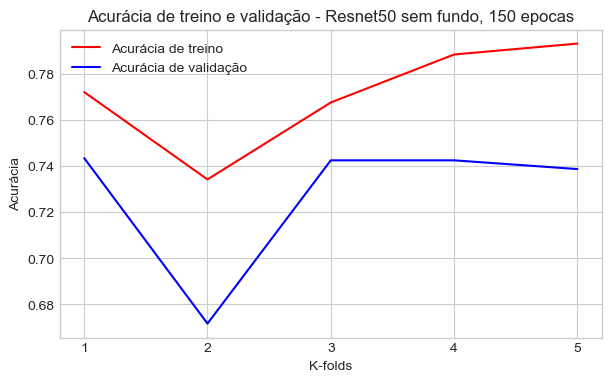

<Figure size 700x400 with 0 Axes>

In [47]:
# plt.style.use('fast')
results_df = pd.read_csv(f'cross_validation_results_with_time_more_epochs.csv')
plt.figure(figsize=(7,4))
plt.xlabel('K-folds')
plt.ylabel('Acurácia')
plt.plot(results_df['Fold'].astype(str), results_df['Train Accuracy'], 'r', label='Acurácia de treino')
plt.plot(results_df['Fold'].astype(str), results_df['Validation Accuracy'], 'b', label='Acurácia de validação')
plt.title('Acurácia de treino e validação - Resnet50 sem fundo, 150 epocas')
plt.legend()

plt.figure(figsize=(7,4))

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

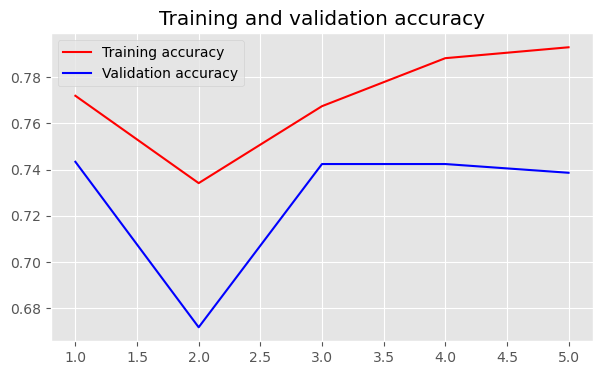

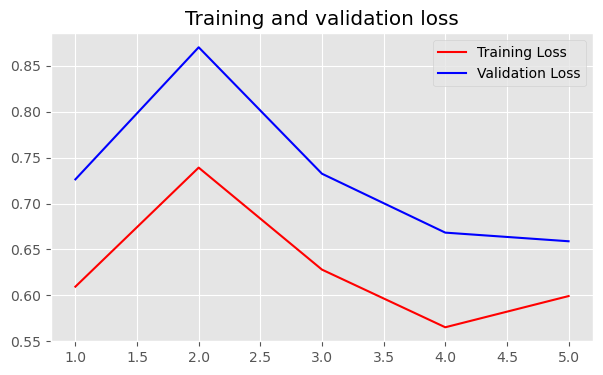

In [36]:
plt.figure(figsize=(7,4))

plt.plot(results_df['Fold'], results_df['Train Accuracy'], 'r', label='Training accuracy')
plt.plot(results_df['Fold'], results_df['Validation Accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,4))

plt.plot(results_df['Fold'], results_df['Train Loss'], 'r', label='Training Loss')
plt.plot(results_df['Fold'], results_df['Validation Loss'], 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import time
from sklearn.metrics import classification_report

accuracies = []
losses = []
val_accuracies = []
val_losses = []
times = []  # To store the duration of each fold

# Gerador de dados
datagen = ImageDataGenerator(rescale=1./255)

# KFold cross-validation
kf = KFold(n_splits=k_folds, random_state=42, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(data):
    print(f'Training fold {fold_no}/{k_folds}...')
    
    # Start timing
    start_time = time.time()

    # Dividindo os dados em treino e validação
    train_data = data[train_index]
    train_labels = labels[train_index]
    df_train = pd.DataFrame({'paths':train_data, 'labels':train_labels}).astype(str)
    
    val_data = data[val_index]
    val_labels = labels[val_index]
    df_val = pd.DataFrame({'paths':val_data, 'labels':val_labels}).astype(str)

    # Geradores de dados
    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train,
        directory=diretorio_base,
        x_col='paths',
        y_col='labels',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_val,
        directory=diretorio_base,
        x_col='paths',
        y_col='labels',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    
    # Criar o modelo
    model = create_model()
    
    # Callbacks
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
    mcp_save = ModelCheckpoint(f'best_model_fold_{fold_no}_more_epochs.h5', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')
    
    # Treinar o modelo
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        callbacks=[early_stopping, mcp_save, reduce_lr_loss]
    )
    
    # Armazenar os resultados
    accuracies.append(history.history['accuracy'][-1])
    losses.append(history.history['loss'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
    val_losses.append(history.history['val_loss'][-1])
    
    # Fazer previsões no conjunto de validação
    val_preds = model.predict(val_generator)
    val_preds_classes = np.argmax(val_preds, axis=1)
    val_true_classes = val_generator.classes
    
    # Gerar e salvar o relatório de classificação
    report = classification_report(val_true_classes, val_preds_classes, target_names=val_generator.class_indices.keys())
    with open(f'classification_report_fold_{fold_no}_more_epochs.txt', 'w') as f:
        f.write(report)
    
    print(f'Classification Report for Fold {fold_no}:\n{report}')
    
    # End timing
    end_time = time.time()
    elapsed_time = end_time - start_time  # Calculate the duration of the fold in seconds
    times.append(elapsed_time)  # Store the duration
    
    print(f'Fold {fold_no} took {elapsed_time:.2f} seconds.')
    
    fold_no += 1
    
# Criar um DataFrame com os resultados
results_df = pd.DataFrame({
    'Fold': range(1, fold_no),
    'Train Accuracy': accuracies,
    'Train Loss': losses,
    'Validation Accuracy': val_accuracies,
    'Validation Loss': val_losses,
    'Time (seconds)': times  # Add the duration of each fold
})

# Salvar os resultados em um arquivo CSV
results_df.to_csv(f'cross_validation_results_with_time_more_epochs.csv', index=False)

In [6]:
results_df['Train Accuracy'].mean(),results_df['Validation Accuracy'].mean()

(0.7709841370582581, 0.7277158379554749)

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['species_code'] = label_encoder.fit_transform(df_train['species'])
df_train['species_code'] = label_encoder.transform(df_train['species'])

In [24]:
with open('label_enconder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [25]:
df_test['species_code'] = label_encoder.transform(df_test['species'])

In [26]:
df_train.head()

,index,species,file_path,folder,folder_division,full_path,species_code
0,0,marasmiusamazonicus,marasmiusamazonicus_214.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/Marasmiusamazonicus_PRE_PROCESSING/marasmiusamazonicus_214.jpg,4
1,1,marasmiusamazonicus,marasmiusamazonicus_200.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/Marasmiusamazonicus_PRE_PROCESSING/marasmiusamazonicus_200.jpg,4
2,2,marasmiusamazonicus,marasmiusamazonicus_228.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/Marasmiusamazonicus_PRE_PROCESSING/marasmiusamazonicus_228.jpg,4
3,3,marasmiusamazonicus,marasmiusamazonicus_89.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/Marasmiusamazonicus_PRE_PROCESSING/marasmiusamazonicus_89.jpg,4
4,4,marasmiusamazonicus,marasmiusamazonicus_189.jpg,Marasmiusamazonicus_PRE_PROCESSING,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train,/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp/train/Marasmiusamazonicus_PRE_PROCESSING/marasmiusamazonicus_189.jpg,4


In [36]:
df_train.groupby(['species','species_code']).count()['index'].reset_index().to_csv('species_code.csv')

### Baseline without Data Augmentation

In [40]:
img_height = 224
img_width = 224
channels = 3
num_classes= df_train['species'].nunique()
X_train = img_train_normalized
y_train = df_train['species_code']
X_test = img_test_normalized
y_test = df_test['species_code']

In [41]:
y_test = np.asarray(y_test).astype('int').reshape((-1,1))

In [42]:
y_train = np.asarray(y_train).astype('int').reshape((-1,1))

In [43]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False,
                  input_shape=(img_height, img_width, channels))

2024-08-11 20:53:40.779229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
for layer in base_model.layers:
    layer.trainable=False

In [46]:
base_model.compile()
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [47]:
# with open('first_version.pickle', 'rb') as handle:
#     model = pickle.load(handle)

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# Definir o Early Stopping
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint('{epoch:02d}-{val_loss:.2f}.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, 
                    y_train,
                    epochs=50, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, mcp_save, reduce_lr_loss])

Epoch 1/50
67/67 [==============================] - 188s 3s/step - loss: 0.6172 - accuracy: 0.8328 - val_loss: 0.1086 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 2/50
67/67 [==============================] - 16788s 254s/step - loss: 0.0940 - accuracy: 0.9673 - val_loss: 0.0235 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 3/50
67/67 [==============================] - 9290s 3s/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0292 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 4/50
67/67 [==============================] - 2996s 45s/step - loss: 0.0299 - accuracy: 0.9897 - val_loss: 0.0134 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 5/50
67/67 [==============================] - 14896s 226s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 6/50
67/67 [==============================] - 196s 3s/step - loss: 6.6218e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9959 - lr: 0.0010
Epoch 7/50
67/67 [==============================] - 228s 3s/s

In [12]:
model.fit()

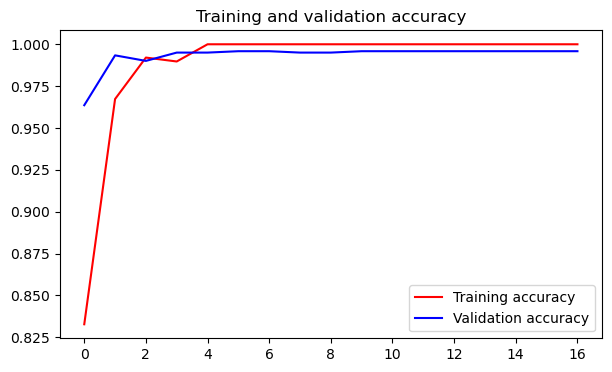

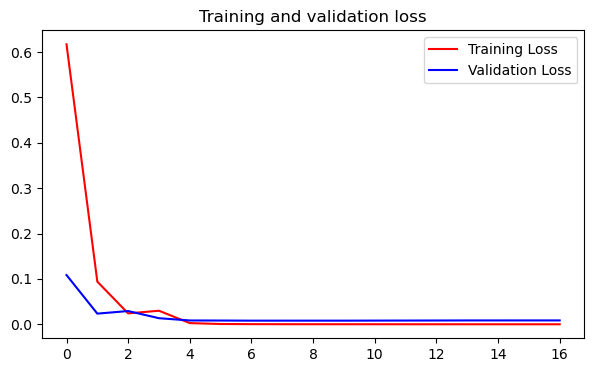

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,4))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,4))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 26,215,818
Trainable params: 2,628,106
Non-trainable params: 23,587,712
____________________________________

In [51]:
with open('model_10_classes.pickle', 'wb') as handle:
    pickle.dump(model, handle)

INFO:tensorflow:Assets written to: ram://2d141b17-9869-49b8-9f96-ca06a256909e/assets


INFO:tensorflow:Assets written to: ram://2d141b17-9869-49b8-9f96-ca06a256909e/assets


In [52]:
def get_predictions(model, examples, y_true):
    """Realiza predicoes para todos os exemplos e retorna um dataframe com os valores reais e os valores preditos"""
    predictions = model.predict(examples)

    predicted_labels = np.argmax(predictions, axis=1)


    df_predictions = pd.DataFrame({'true_label': y_true.reshape(-1),
                                   'predicted_label': predicted_labels})

    return df_predictions



In [53]:
df_pred_test = get_predictions(model, X_test, y_test)

38/38 [==============================] - 69s 2s/step


In [54]:
df_pred_test_new = df_test.join(df_pred_test)

In [55]:
df_pred_train = get_predictions(model, X_train, y_train)

67/67 [==============================] - 126s 2s/step


In [56]:
df_pred_train_new = df_train.join(df_pred_train)

In [57]:
from sklearn.metrics import accuracy_score
print('ACcuracy', accuracy_score(df_pred_train_new['true_label'], df_pred_train_new['predicted_label']))
print('ACcuracy', accuracy_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label']))

ACcuracy 1.0
ACcuracy 0.9958643507030603


In [58]:
from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(df_pred_test_new['true_label'], df_pred_test_new['predicted_label']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       103
           2       0.99      1.00      1.00       103
           3       0.99      0.99      0.99        68
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00        92
           6       1.00      0.99      1.00       105
           7       1.00      1.00      1.00       167
           8       0.98      1.00      0.99        96
           9       0.99      0.97      0.98       112

    accuracy                           1.00      1209
   macro avg       0.99      0.99      0.99      1209
weighted avg       1.00      1.00      1.00      1209



In [59]:
dict_classification_report = classification_report(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'], output_dict=True)

In [60]:
df_class_report = pd.DataFrame(dict_classification_report).transpose()

In [61]:
df_class_report = df_class_report.reset_index().rename(columns={'index':'species_code'})

In [62]:
df_class_report_sin_acc = df_class_report[:-3]

In [63]:
df_class_report_sin_acc['species_code'] = df_class_report_sin_acc['species_code'].astype(int)

/var/folders/rt/0g5y9_m12p51plqsw3ghnp2d381wqs/T/ipykernel_14019/1557333058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_report_sin_acc['species_code'] = df_class_report_sin_acc['species_code'].astype(int)


In [64]:
df_class_report_sin_acc.columns

Index(['species_code', 'precision', 'recall', 'f1-score', 'support'], dtype='object')

In [65]:
df_class_report_sin_acc['precision'].describe()

count    10.000000
mean      0.994618
std       0.007588
min       0.979592
25%       0.990516
50%       1.000000
75%       1.000000
max       1.000000
Name: precision, dtype: float64

In [66]:
df_class_report_sin_acc['f1-score'].describe()

count    10.000000
mean      0.994735
std       0.006801
min       0.981982
25%       0.991060
50%       0.997608
75%       1.000000
max       1.000000
Name: f1-score, dtype: float64

In [67]:
df_class_report_sin_acc['recall'].describe()

count    10.000000
mean      0.994898
std       0.009215
min       0.973214
25%       0.992857
50%       1.000000
75%       1.000000
max       1.000000
Name: recall, dtype: float64

In [68]:
df_class_report_sin_acc.merge(df_test[['species','species_code']].drop_duplicates(), on='species_code').to_excel('metrics_test.xlsx')

In [69]:
from sklearn.metrics import recall_score,f1_score,roc_auc_score,precision_score


In [70]:
precision_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'], average = 'macro')

0.9946179660675458

In [71]:
macro_averaged_recall = recall_score(df_pred_test_new['true_label'], 
                                             df_pred_test_new['predicted_label'], 
                                             average = 'macro')

print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")


Macro-averaged recall score using sklearn : 0.9948984593837535


In [72]:
macro_averaged_f1 = f1_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'], average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")


Macro-Averaged F1 score using sklearn library : 0.9947351214408913


In [73]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [74]:
dict_roc = roc_auc_score_multiclass(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'])

In [75]:
np.mean([i for i in dict_roc.values()])

0.9972247744147396

In [76]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(df_pred_test_new['true_label'], df_pred_test_new['predicted_label'])

0.9953529526623853

In [77]:
count=0

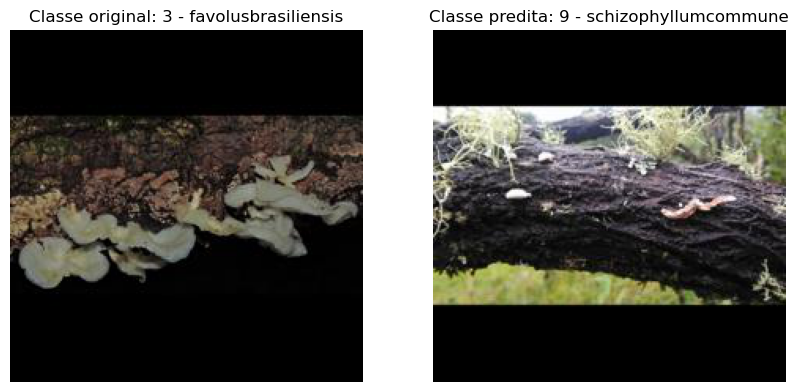

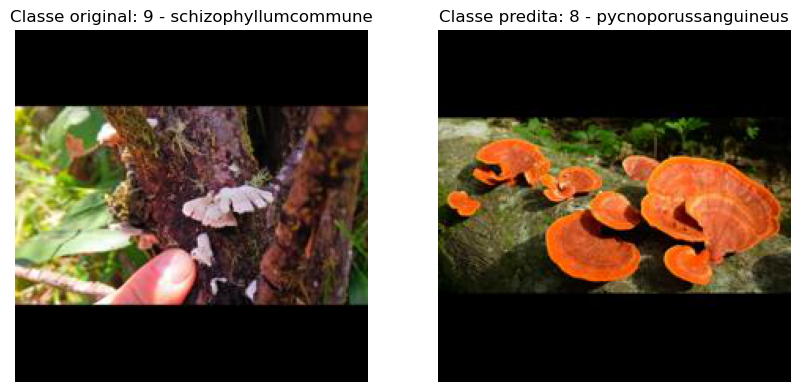

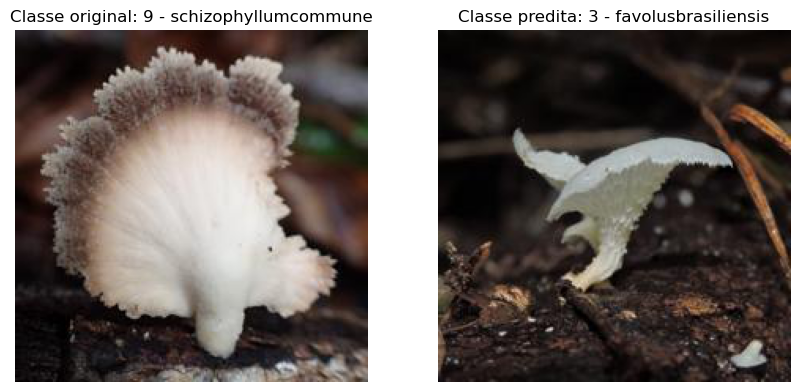

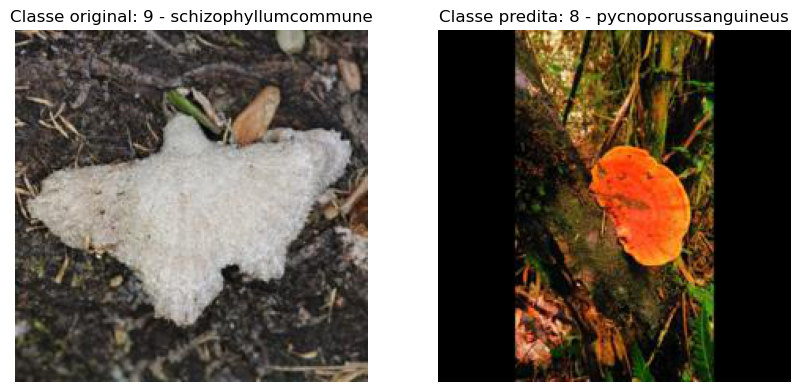

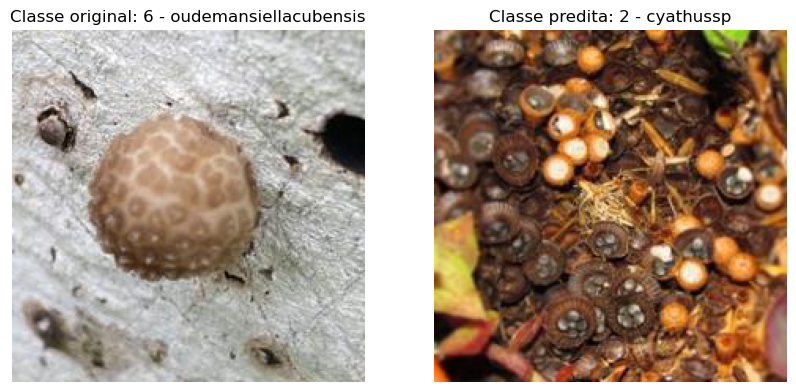

In [86]:
for i, j, full_path in zip(df_pred_test_new['species_code'], df_pred_test_new['predicted_label'], df_pred_test_new['full_path']):
    
    path_specie_true = full_path
    path_specie_predicted = df_pred_test_new.loc[df_pred_test_new['species_code']==j, 'full_path'].sample(n=1).values[0]
    
    specie_true = df_pred_test_new.loc[df_pred_test_new['species_code']==i, 'species'].iloc[0]
    specie_predicted = df_pred_test_new.loc[df_pred_test_new['species_code']==j, 'species'].iloc[0]
    
    if i != j:
        count+=1
        img_true = Image.open(path_specie_true)
        img_predicted = Image.open(path_specie_predicted)

        # Exibir as imagens usando matplotlib
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        axs[0].imshow(img_true, cmap='gray')
        axs[0].set_title('Classe original: {0} - {1}'.format(i,specie_true))
        axs[0].axis('off')  # Oculta os eixos para melhorar a visualização

        axs[1].imshow(img_predicted, cmap='gray')
        axs[1].set_title('Classe predita: {0} - {1}'.format(j, specie_predicted))
        axs[1].axis('off')  # Oculta os eixos para melhorar a visualização

        plt.show()

In [13]:
# train_folder = os.path.join(diretorio_base, 'train')
# test_folder = os.path.join(diretorio_base, 'test')

# for files_species in df['file_paths']:
#     random.seed(42)
#     random.shuffle(files_species)
    
#     # determine the number of images for each set
#     train_size = int(len(files_species) * 0.70)
#     test_size = int(len(files_species) * 0.30)
    
#     # Create destination folders if they don't exist
#     for folder_path in [train_folder, test_folder]:
#         if not os.path.exists(folder_path):
#             os.makedirs(folder_path)
            
#     # Copy image files to destination folders
#     for i, f in enumerate(files_species):
#         if i < train_size:
#             dest_folder = train_folder
#         else:
#             dest_folder = test_folder
        
#         for folder in folders:
#             if not os.path.exists(os.path.join(dest_folder, folder)):
#                 os.makedirs(os.path.join(dest_folder, folder))
    
#         shutil.copyfile(src=os.path.join(diretorio_base, f), dst=os.path.join(dest_folder, f))

# def get_data(folder_division):
#     df = pd.DataFrame(columns=['species','file_path','folder','folder_division'])

#     for files in os.listdir(folder_division):
#         if '.' not in files:
#             qty_files = len(os.listdir(os.path.join(folder_division, files)))
#             species = files.split('_')[0].lower()
#             df_temp = pd.DataFrame(data={'species':[species]*qty_files,
#                                          'file_path':os.listdir(os.path.join(folder_division, files)),
#                                          'folder':[files]*qty_files,
#                                          'folder_division':[folder_division]*qty_files},
#                                    columns=['species','file_path','folder','folder_division'])

#             df = pd.concat([df, df_temp])
#     return df.reset_index()

# df_train = get_data(train_folder)
# df_train['full_path'] = df_train['folder_division'] + '/' + df_train['folder'] + '/' + df_train['file_path']
# df_test = get_data(test_folder)
# df_test['full_path'] = df_test['folder_division'] + '/' + df_test['folder'] + '/' + df_test['file_path']